In [ ]:
# Imports

import tensorflow as tf
import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Splitting Traning and Test data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
# Data Preprocessing

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train, y_test = y_train.flatten(), y_test.flatten()

In [ ]:
# Sequential Model

cnn = tf.keras.models.Sequential()

# 1
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=[3,3], strides = [1, 1], activation='relu', padding='same', input_shape=(32, 32, 3)))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=[3,3], strides = [1, 1], activation='relu', padding='same', input_shape=(32, 32, 3)))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# 2
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=[3,3], strides = [1, 1], activation='relu', padding='same', input_shape=(32, 32, 3)))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=[3,3], strides = [1, 1], activation='relu', padding='same', input_shape=(32, 32, 3)))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dropout(rate = 0.2))

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
# Compiling

cnn.compile(optimizer ="adam" , loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = [keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
# Fitting Train History

train_history = cnn.fit(x_train, y_train, batch_size=32, epochs=21, validation_split=0.2)

Epoch 1/21


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1250/1250 [==============================] - 22s 8ms/step - loss: 1.3615 - sparse_categorical_accuracy: 0.5156 - val_loss: 1.1600 - val_sparse_categorical_accuracy: 0.5882
Epoch 2/21
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9481 - sparse_categorical_accuracy: 0.6612 - val_loss: 1.0215 - val_sparse_categorical_accuracy: 0.6520
Epoch 3/21
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7853 - sparse_categorical_accuracy: 0.7236 - val_loss: 0.9249 - val_sparse_categorical_accuracy: 0.6914
Epoch 4/21
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6763 - sparse_categorical_accuracy: 0.7639 - val_loss: 0.8137 - val_sparse_categorical_accuracy: 0.7242
Epoch 5/21
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5879 - sparse_categorical_accuracy: 0.7915 - val_loss: 0.7825 - val_sparse_categorical_accuracy: 0.7340
Epoch 6/21
1250/1250 [==============================] - 8s 6ms/step - loss: 0.5130 - sparse_categori

In [ ]:
# Traning Evaluation History

evaluate_history = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2521 - sparse_categorical_accuracy: 0.7452


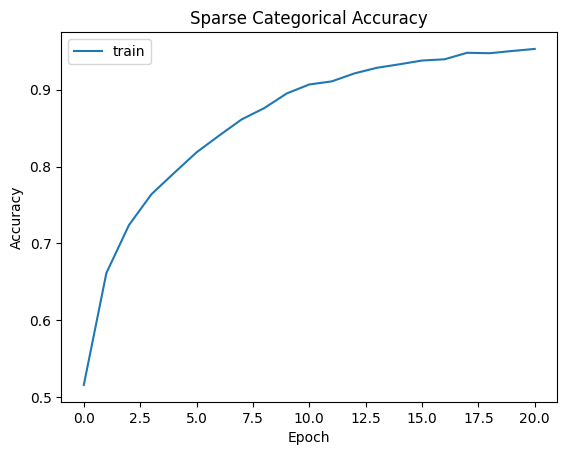

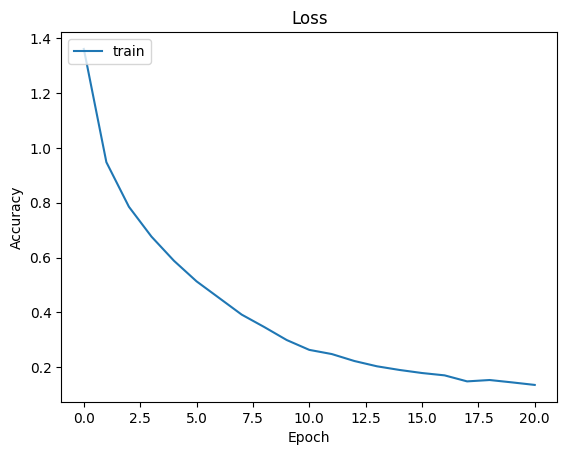

In [ ]:
# Plotting Sparse Categorical Accuracy and Loss Results

plt.plot(train_history.history['sparse_categorical_accuracy'])
plt.title('Sparse Categorical Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(train_history.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
# Computing Confusion Matrix and Accuracy Score

y_pred = np.argmax(cnn.predict(x_test), axis = 1)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
print('Accuracy Score')
accuracy_score(y_test, y_pred)

313/313 [==============================] - 2s 5ms/step
Confusion Matrix
[[685  13 131  13  33   3   9  13  78  22]
 [ 11 849  14   6   4   5   7   2  30  72]
 [ 27   4 744  34  75  32  52  17  11   4]
 [ 17   6 120 536  74 105  72  38  18  14]
 [  7   7  95  35 735  18  40  44  16   3]
 [  6   5  84 183  55 574  24  54   9   6]
 [  4   6  71  41  39  12 810   5   8   4]
 [ 10   3  43  32  60  34  10 795   5   8]
 [ 20  24  28   4   9   1   8   2 891  13]
 [ 22  59  11   5   5   4   4  10  47 833]]
Accuracy Score


0.7452

In [ ]:
# Classification Report

from sklearn.metrics import classification_report

labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred, target_names=labels))

Classification Report: 
               precision    recall  f1-score   support

    airplane       0.85      0.69      0.76      1000
  automobile       0.87      0.85      0.86      1000
        bird       0.55      0.74      0.64      1000
         cat       0.60      0.54      0.57      1000
        deer       0.67      0.73      0.70      1000
         dog       0.73      0.57      0.64      1000
        frog       0.78      0.81      0.80      1000
       horse       0.81      0.80      0.80      1000
        ship       0.80      0.89      0.84      1000
       truck       0.85      0.83      0.84      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.74     10000
weighted avg       0.75      0.75      0.74     10000

